In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("/Users/sakshighatge/Desktop/new.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

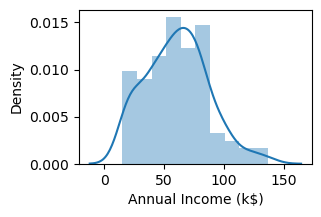

In [5]:
plt.figure(figsize=(3,2))
sns.distplot(df["Annual Income (k$)"])

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

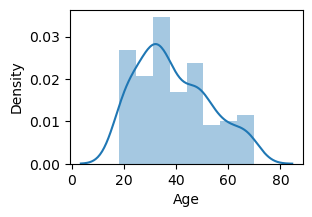

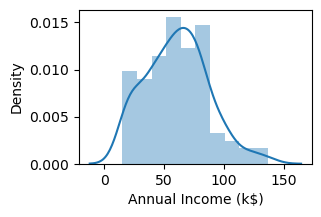

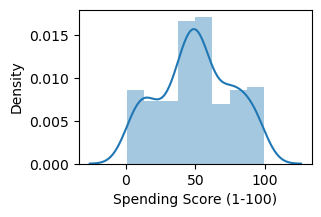

In [7]:
columns=[ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(3,2))
    sns.distplot(df[i])
    
    

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

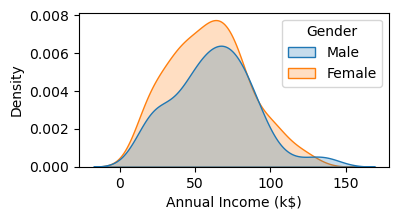

In [8]:
plt.figure(figsize=(4,2))
sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender", fill=True)


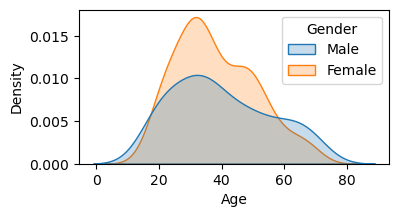

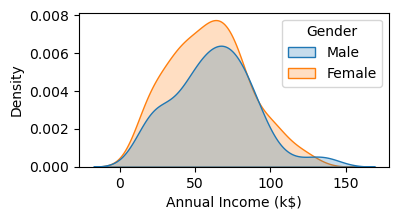

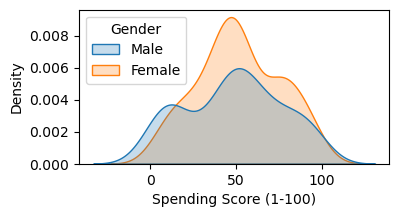

In [9]:
columns=[ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(4,2))
    sns.kdeplot(data=df, x=i, hue="Gender", fill=True)

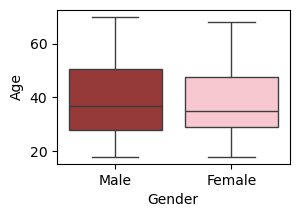

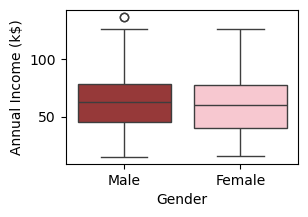

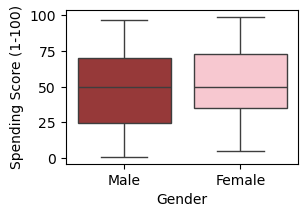

In [10]:
columns=[ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(data=df, x="Gender",y=i,palette={"Male": "brown", "Female": "pink"})

In [11]:
df["Gender"].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [12]:
# Bivarient Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

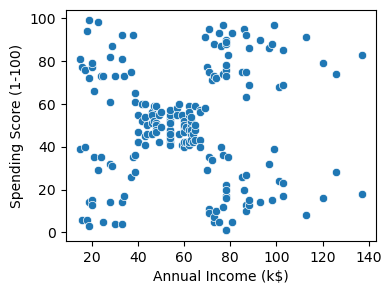

In [13]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

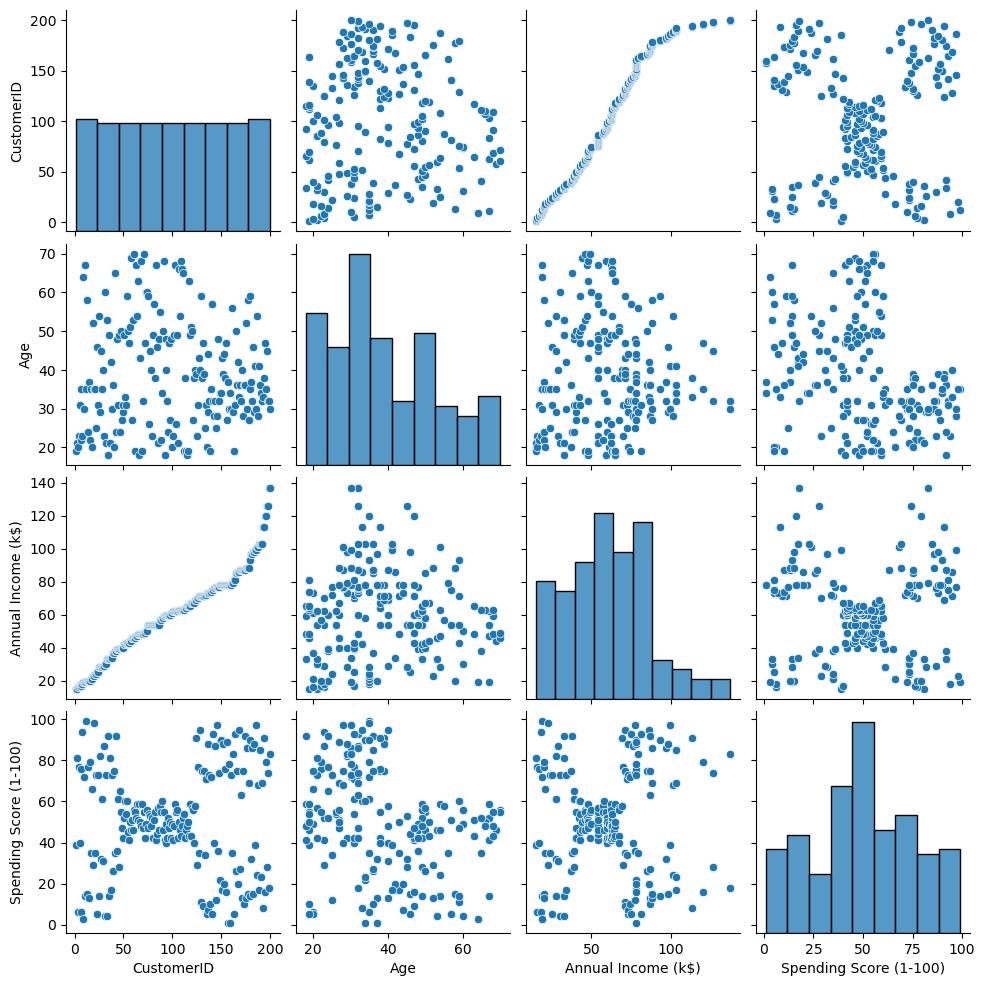

In [14]:
sns.pairplot(df)

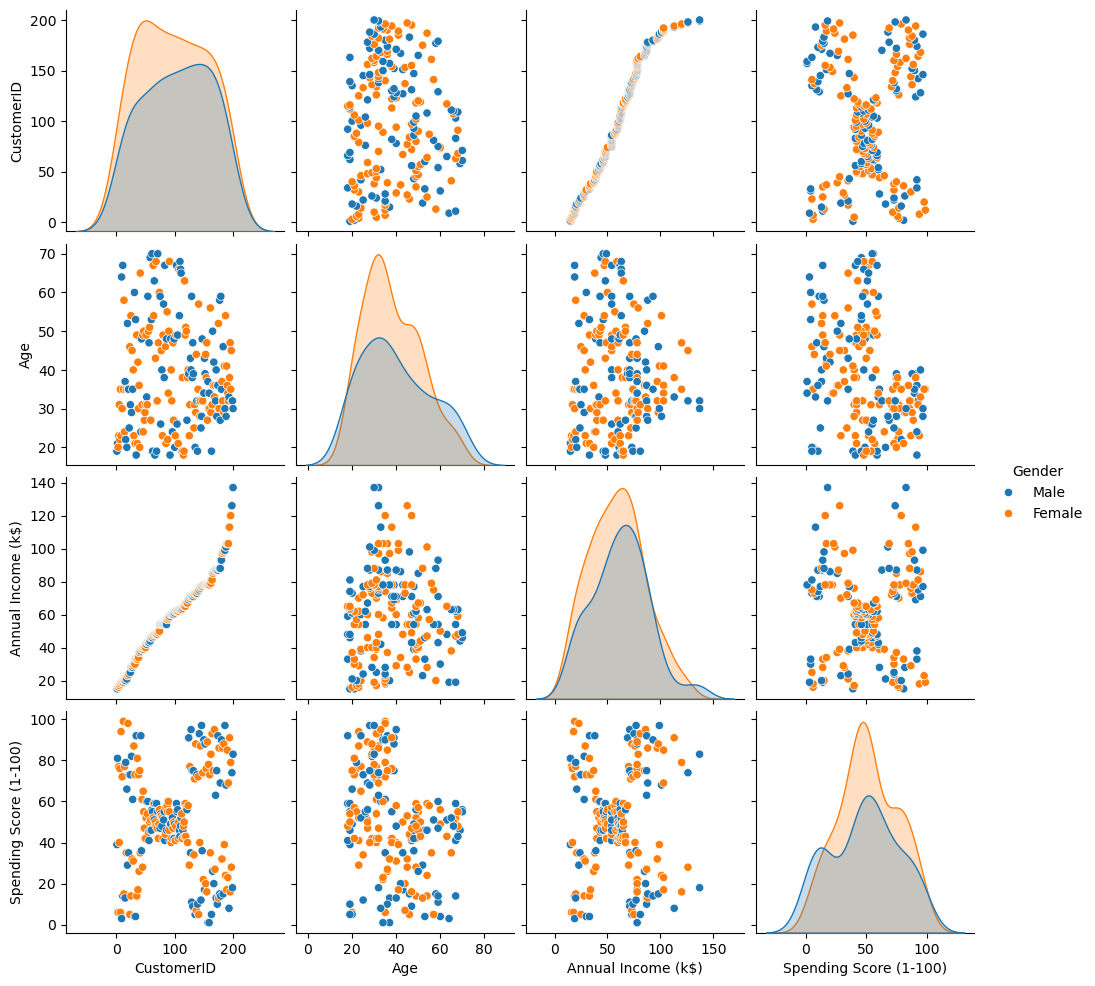

In [15]:
sns.pairplot(df,hue='Gender')
plt.show()

In [16]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = df_numeric.corr()  # Compute correlation
print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


<Axes: >

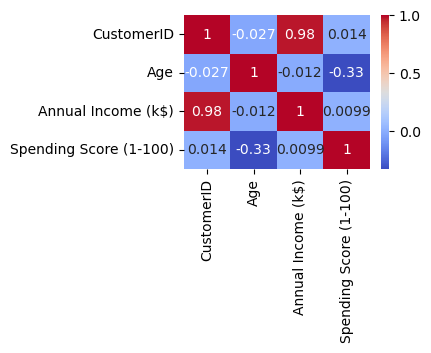

In [18]:
plt.figure(figsize=(3,2))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")


In [19]:
# Clustering- Univarient,Bivarient and multivarent

In [20]:
Clustering1=KMeans(n_clusters=3)

In [21]:
Clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [22]:
Clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [23]:
df['income cluster']=Clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [24]:
df['income cluster'].value_counts()

income cluster
2    86
0    58
1    56
Name: count, dtype: int64

In [25]:
Clustering1.inertia_

25640.457784396836

In [26]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['income cluster']])
    inertia_scores.append(kmeans.inertia_)

In [27]:
inertia_scores

[140.07999999999998,
 33.91549295774648,
 3.9492349067626904e-29,
 3.9492349067626904e-29,
 3.9492349067626904e-29,
 2.995206249511029e-29,
 2.995206249511029e-29,
 3.9492349067626904e-29,
 2.995206249511029e-29,
 3.9492349067626904e-29]

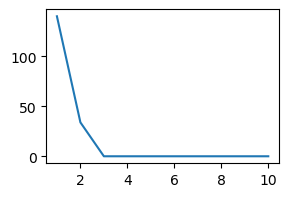

In [28]:
plt.figure(figsize=(3,2))
plt.plot(range(1,11),inertia_scores)

In [58]:
df.groupby('income cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,37.120690,29.551724,49.689655
1,36.910714,92.142857,50.517857
2,41.279070,60.906977,50.337209


In [ ]:
# Bivarent clustering

In [68]:
Clustering2=KMeans(n_clusters=5)
Clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income cluster']=Clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,1


<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

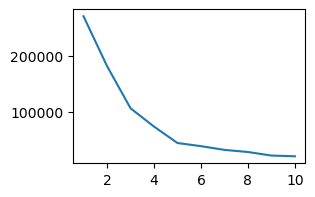

In [70]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
    plt.figure(figsize=(3,2))
plt.plot(range(1,11),inertia_scores2)

In [93]:
Clustering2.cluster_centers_

array([[ 25.72727273,  79.36363636],
       [ 48.16831683,  43.3960396 ],
       [109.7       ,  82.        ],
       [ 87.        ,  18.63157895],
       [ 78.55172414,  82.17241379]])

In [99]:
centers=pd.DataFrame(Clustering2.cluster_centers_)
centers.columns=['x','y']

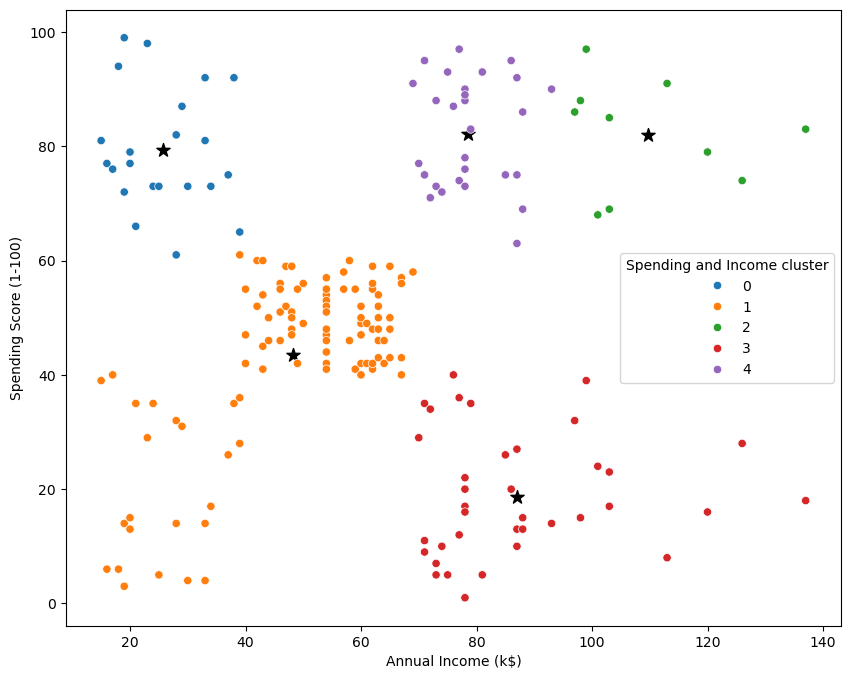

In [129]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [103]:
pd.crosstab(df['Spending and Income cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income cluster,,
0,0.590909,0.409091
1,0.594059,0.405941
2,0.600000,0.400000
3,0.473684,0.526316
4,0.517241,0.482759


In [105]:
df.groupby('Spending and Income cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,25.272727,25.727273,79.363636
1,43.603960,48.168317,43.396040
2,32.200000,109.700000,82.000000
3,40.394737,87.000000,18.631579
4,32.862069,78.551724,82.172414


In [107]:
# multivarient clustering
from sklearn.preprocessing import StandardScaler

In [109]:
scale=StandardScaler()

In [111]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,1


In [113]:
# to convert catagorical to numerical(one hot encoding for gender)
dff=pd.get_dummies(df)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income cluster,Gender_Female,Gender_Male
0,1,19,15,39,0,1,False,True
1,2,21,15,81,0,0,False,True
2,3,20,16,6,0,1,True,False
3,4,23,16,77,0,0,True,False
4,5,31,17,40,0,1,True,False


In [115]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income cluster,Gender_Male
0,1,19,15,39,0,1,True
1,2,21,15,81,0,0,True
2,3,20,16,6,0,1,False
3,4,23,16,77,0,0,False
4,5,31,17,40,0,1,False


In [119]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'Spending and Income cluster', 'Gender_Male'],
      dtype='object')

In [121]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
        'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [125]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

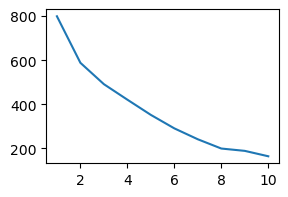

In [127]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
    plt.figure(figsize=(3,2))
plt.plot(range(1,11),inertia_scores3)